# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Andhin Vaniza Zahranie
- **Email:** m006b4kx0495@bangkit.academy
- **ID Dicoding:** andhinvaniza

## Menentukan Pertanyaan Bisnis

- Bagaimana musim memengaruhi peminjaman sepeda?
- Pada weekdays, hari apa yang paling banyak pengunjung meminjam sepeda?



## Import Semua Packages/Library yang Digunakan

In [ ]:
pip install streamlit

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency
%matplotlib inline
sns.set(style='dark')



## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv("day.csv")

In [ ]:
hour_df = pd.read_csv("hour.csv")

In [ ]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Karena pada kedua data tidak ada missing value maka tidak perlu perilaku khusus untuk mengatasi missing value pada kedua data di atas


### Cleaning Data

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Tidak dilakukan cleaning data karena tidak terdapat missing values, duplicate data dan innacurate data. hanya pengubahan tipe data menjadi tanggal pada kolom date time

## Exploratory Data Analysis (EDA)

### Eksplorasi data


In [ ]:
describe_day = day_df.describe()
describe_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Pada tabel di atas, terlihat bahwa nilai rata-rata dari season adalah 2.496, yang mendekati musim ke-3. Ini menunjukkan bahwa sebagian besar data berada di sekitar musim kedua dan ketiga (kemungkinan musim semi dan musim panas).

In [ ]:
weekday_sum = day_df.groupby(['weekday']).agg({'cnt':'sum'}).reset_index()
weekday_sum

,weekday,cnt
0,0,444027
1,1,455503
2,2,469109
3,3,473048
4,4,485395
5,5,487790
6,6,477807


Melalui tabel di atas pesanan terbanyak adalah Hari Jumat, dengan jumlah pesanan mencapai 487.790, diikuti oleh Hari Kamis dan Sabtu yang masing-masing mencatatkan 485.395 dan 477.807 pesanan. Sebaliknya, hari dengan pesanan terendah adalah Minggu, dengan total 444.027 pesanan.

In [ ]:
day_sum = day_df.groupby(['season']).agg({'cnt':'sum'}).reset_index()
day_sum

,season,cnt
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


Berdasarkan data, jumlah pesanan tertinggi terjadi pada musim panas dengan 1.061.129 pesanan, diikuti oleh musim semi dan musim gugur dengan masing-masing 918.589 dan 841.613 pesanan. Musim dingin memiliki jumlah pesanan terendah, yaitu 471.348. Ini menunjukkan bahwa produk atau layanan lebih populer selama musim panas dan paling sedikit digunakan pada musim dingin.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-46-beb56f364ed0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


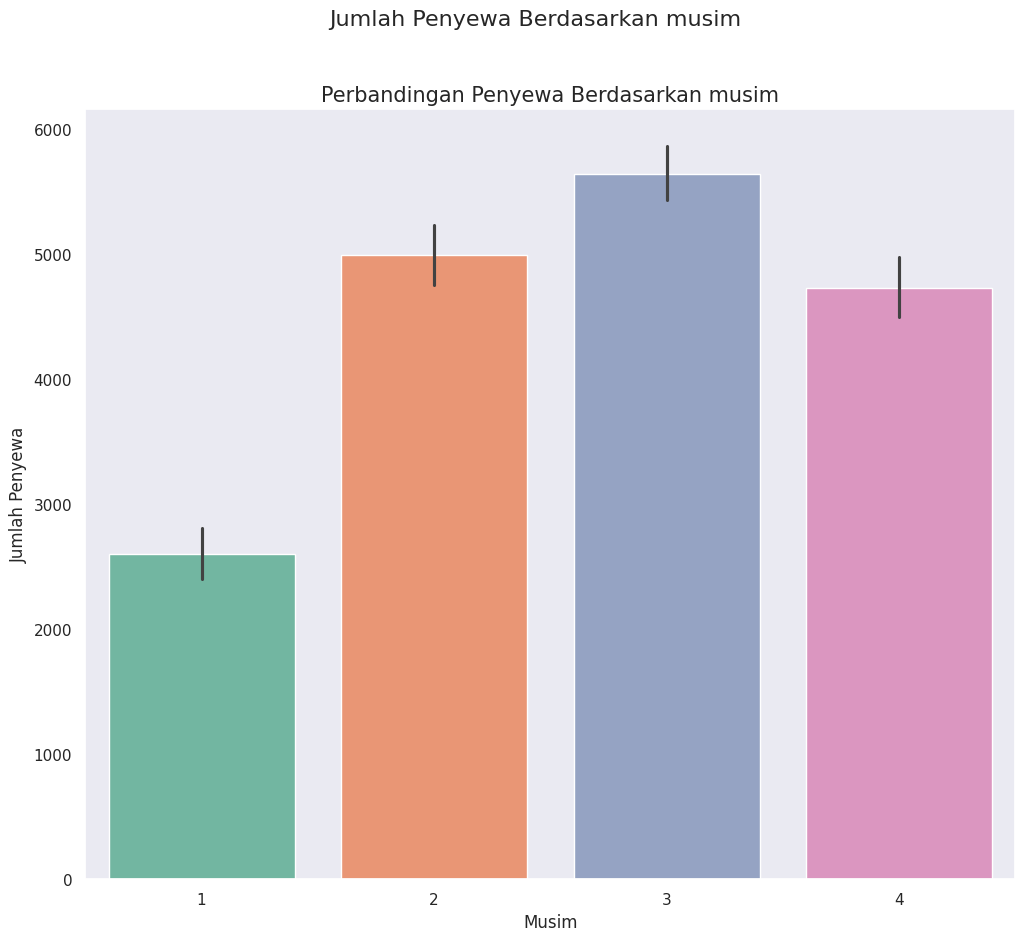

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(12, 10))
plt.suptitle("Jumlah Penyewa Berdasarkan musim", fontsize=16)

sns.barplot(
    y="cnt",
    x="season",
    data=day_df.sort_values(by="cnt", ascending=False),
    palette="Set2"
)
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Jumlah Penyewa", fontsize=12)
plt.title("Perbandingan Penyewa Berdasarkan musim", fontsize=15)
plt.show()

### Pertanyaan 2:

In [ ]:
day_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

day_df['weekday'] = day_df['weekday'].map(day_mapping)

# Display the resulting DataFrame
print(day_df)

     instant     dteday  season  yr  mnth  holiday    weekday  workingday  \
0          1 2011-01-01       1   0     1        0   Saturday           0   
1          2 2011-01-02       1   0     1        0     Sunday           0   
2          3 2011-01-03       1   0     1        0     Monday           1   
3          4 2011-01-04       1   0     1        0    Tuesday           1   
4          5 2011-01-05       1   0     1        0  Wednesday           1   
..       ...        ...     ...  ..   ...      ...        ...         ...   
726      727 2012-12-27       1   1    12        0   Thursday           1   
727      728 2012-12-28       1   1    12        0     Friday           1   
728      729 2012-12-29       1   1    12        0   Saturday           0   
729      730 2012-12-30       1   1    12        0     Sunday           0   
730      731 2012-12-31       1   1    12        0     Monday           1   

     weathersit      temp     atemp       hum  windspeed  casual  registere

<ipython-input-48-30ca59e09f3d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


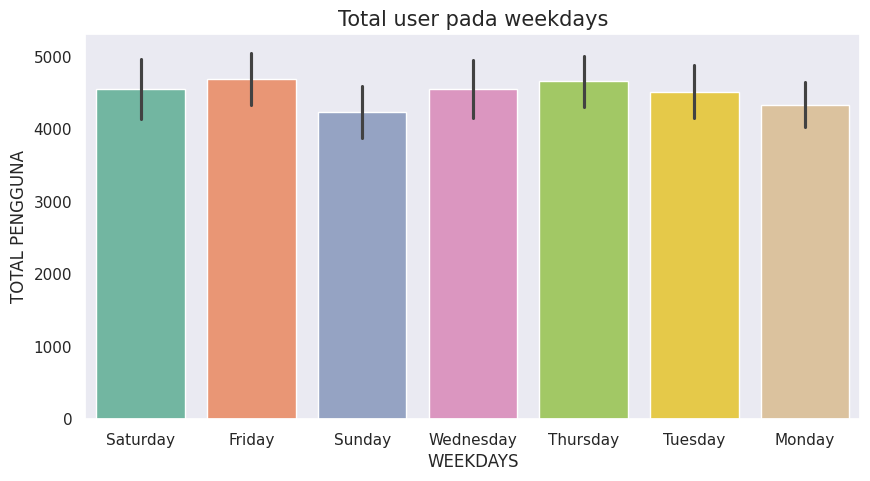

In [ ]:
fig = plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="weekday",
    data=day_df.sort_values(by="cnt", ascending=False),
    palette="Set2"
)
plt.title("Total user pada weekdays", loc="center", fontsize=15)
plt.ylabel("TOTAL PENGGUNA")
plt.xlabel("WEEKDAYS")
plt.show()


## Conclusion

- Conclusion pertanyaan 1 : Dapat dilihat bahwa jumlah penyewa sepeda naik pada Fall season (musim gugur), dan turun pada springer season (musim semi)

- Conclusion pertanyaan 2 : Melalui tabel di atas pesanan terbanyak adalah Hari Sabtu, dengan jumlah pesanan mencapai 487.790, diikuti oleh Jumat dan Minggu yang masing-masing mencatatkan 485.395 dan 477.807 pesanan. Sebaliknya, hari dengan pesanan terendah adalah Senin, dengan total 444.027 pesanan.